# Python imports

In [1]:
# Show plots as part of the notebook (this is a Jupyter-specific operation)
%matplotlib inline
import time
import matplotlib.pyplot as plt
import requests
import xmltodict
# Standard library packages
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

# Import Biopython tools for running local BLASTX
from Bio.Blast.Applications import NcbiblastxCommandline
from Bio.Blast.Applications import NcbiblastnCommandline

#For execution time tracking
from datetime import datetime
from pytz import timezone

In [2]:
now_time = datetime.now(timezone('America/Chicago'))
print(now_time.strftime('%I:%M:%S %p'))

09:56:49 PM


# Running and analyzing a local BLASTN search for July142020-ALL-R1.fasta

In [3]:
cmd_blastn = NcbiblastnCommandline(query='July142020-ALL-R1.fasta',
                      out='July142020-ALL-R1_blastn.tab',
                      outfmt=6,
                      db='db_ref_ALL_16S/db_ref_ALL_16S',
                      num_threads = 64)

In [4]:
# Get a working command-line
print(cmd_blastn)

blastn -out July142020-ALL-R1_blastn.tab -outfmt 6 -query July142020-ALL-R1.fasta -db db_ref_ALL_16S/db_ref_ALL_16S -num_threads 64


In [5]:
%%time
cmd_blastn()

CPU times: user 756 ms, sys: 567 ms, total: 1.32 s
Wall time: 4h 24min 12s


('', '')

In [ ]:
#https://widdowquinn.github.io/2018-03-06-ibioic/02-sequence_databases/03-programming_for_blast.html#runblastx
# Run BLASTX, and catch STDOUT/STDERR
# !! Do not execute cell if skipping computation !!
#stdout, stderr = cmd_blastn()

# Check STDOUT, STDERR
#print("STDOUT: %s" % stdout)
#print("STDERR: %s" % stderr)

# EDA for BLAST Results: "July142020-ALL-R1_blastn.tab" 

In [2]:
# !! If you are skipping computational steps, uncomment the line below !!
#blastout = os.path.join('prepped', 'kitasatospora', 'AMK19_00175_blastx_kitasatospora.tab')  # BLAST output

# Read BLASTX output
results = pd.read_csv("July142020-ALL-R1_blastn.tab", sep="\t", header=None)

In [3]:
results.shape

(17592254, 12)

In [4]:
# Inspect results table
results.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,8.500000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.410000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0


In [5]:
# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results.columns = headers

# Inspect modified table
results.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,8.500000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.410000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0


In [6]:
# Show a summary of the results table data
results.describe()

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07
mean,9.075628e+01,1.063887e+02,9.841828e+00,9.337685e-01,1.467575e+01,1.195183e+02,7.924650e+04,7.924554e+04,6.606183e-08,1.355527e+02
std,5.302975e+00,3.873977e+01,7.041221e+00,1.630147e+00,2.426050e+01,3.546436e+01,3.583510e+05,3.583511e+05,3.721963e-05,4.917367e+01
min,7.284800e+01,2.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,1.700000e-74,3.810000e+01
25%,8.698600e+01,7.300000e+01,4.000000e+00,0.000000e+00,1.000000e+00,9.400000e+01,7.190000e+02,7.170000e+02,3.840000e-41,9.710000e+01
50%,9.090900e+01,1.120000e+02,9.000000e+00,0.000000e+00,2.000000e+00,1.350000e+02,6.070000e+03,6.067000e+03,1.810000e-29,1.300000e+02
75%,9.473700e+01,1.450000e+02,1.500000e+01,1.000000e+00,1.700000e+01,1.510000e+02,8.340900e+04,8.340300e+04,1.840000e-19,1.690000e+02
max,1.000000e+02,1.790000e+02,4.100000e+01,2.000000e+01,1.250000e+02,1.510000e+02,6.574866e+06,6.574884e+06,1.100000e-01,2.790000e+02


In [7]:
# Show all subject matches
print(results['subject'])

0            KJ410683.1
1            KJ410683.1
2           NC_031144.1
3           NC_031144.1
4            KX284709.1
               ...     
17592249       M26358.1
17592250     AY102613.1
17592251     AY690210.1
17592252     AF149916.1
17592253     HM973758.1
Name: subject, Length: 17592254, dtype: object


In [8]:
results.shape

(17592254, 12)

## Filter BLASTn Results (E-Value < 1e-20 & pc_identity >= 95.00)

In [9]:
results_target_ev = results.loc[results['e_value'] < 1e-20]

In [10]:
results_target_ev.shape

(12603414, 12)

In [11]:
results_target_pci = results_target_ev.loc[results_target_ev['pc_identity'] >= 95.00]

In [12]:
results_target_pci.shape

(2320615, 12)

In [13]:
results_target_pci.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
820,A00842:193:HMWFWDRXY:1:2101:19316:1501,NC_008588.1,96.104,77,3,0,3,79,33660,33736,2.350000e-28,126.0
821,A00842:193:HMWFWDRXY:1:2101:19316:1501,MN937452.1,96.104,77,3,0,3,79,33653,33729,2.350000e-28,126.0
822,A00842:193:HMWFWDRXY:1:2101:19316:1501,EF067920.1,96.104,77,3,0,3,79,33660,33736,2.350000e-28,126.0
823,A00842:193:HMWFWDRXY:1:2101:19316:1501,MW645084.1,96.053,76,3,0,3,78,43340,43415,8.440000e-28,124.0
1592,A00842:193:HMWFWDRXY:1:2101:26639:1689,MW971520.1,95.364,151,7,0,1,151,109800,109650,8.030000e-63,241.0


In [14]:
results_target_pci.to_csv('01_db_blastn_July142020_filtered_1e-20_95perc-id_subj.csv', index=False)

In [15]:
%%time
df = pd.read_csv('01_db_blastn_July142020_filtered_1e-20_95perc-id_subj.csv')

CPU times: user 1.07 s, sys: 112 ms, total: 1.18 s
Wall time: 1.18 s


In [16]:
df.shape

(2320615, 12)

In [17]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:19316:1501,NC_008588.1,96.104,77,3,0,3,79,33660,33736,2.350000e-28,126.0
1,A00842:193:HMWFWDRXY:1:2101:19316:1501,MN937452.1,96.104,77,3,0,3,79,33653,33729,2.350000e-28,126.0
2,A00842:193:HMWFWDRXY:1:2101:19316:1501,EF067920.1,96.104,77,3,0,3,79,33660,33736,2.350000e-28,126.0
3,A00842:193:HMWFWDRXY:1:2101:19316:1501,MW645084.1,96.053,76,3,0,3,78,43340,43415,8.440000e-28,124.0
4,A00842:193:HMWFWDRXY:1:2101:26639:1689,MW971520.1,95.364,151,7,0,1,151,109800,109650,8.030000e-63,241.0


In [18]:
df['subject'].nunique()

9092

### Retrieving (efetch) scientific name (GBSeq_definition) from NCBI nucleotide database (nuccore)
#### seq id header in each 16S fasta sequences of built database which were succsessfully blasted (subject column) will be translated into the corresponding "Genus species" name

In [19]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [20]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [21]:
get_taxon_name("KJ410683.1	")

'Nannochloropsis oceanica strain LAMB0001 chloroplast'

In [22]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [23]:
df = df['subject'].value_counts()
df = pd.Series(df)
df.to_csv('02_July142020-ALL-R1_blastn_1e-20_95perc-id.csv')

In [24]:
df = pd.read_csv('02_July142020-ALL-R1_blastn_1e-20_95perc-id.csv')
df.columns.values[0] = "subject"
df.columns.values[1] = "count"

In [25]:
df.head()

,subject,count
0,JAGRRH010000013.1,16532
1,NC_008588.1,5973
2,MN937452.1,5926
3,NC_014287.1,5916
4,MW645084.1,5905


In [26]:
df.shape

(9092, 2)

In [27]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 5min 29s, sys: 44.7 s, total: 6min 14s
Wall time: 3h 2min 28s


In [28]:
df.to_csv('03_July142020-ALL-R1_blastn_1e-20_95perc-id_taxonomy.csv', index=False)

In [29]:
df = pd.read_csv('03_July142020-ALL-R1_blastn_1e-20_95perc-id_taxonomy.csv')

In [30]:
df.shape

(9092, 3)

In [31]:
df.describe()

,count
count,9092.000000
mean,255.237022
std,636.140839
min,1.000000
25%,22.000000
50%,68.000000
75%,173.000000
max,16532.000000


In [32]:
df.head(50)

,subject,count,taxon_name
0,JAGRRH010000013.1,16532,Nitzschia inconspicua strain hildebrandi tig00...
1,NC_008588.1,5973,Phaeodactylum tricornutum chloroplast
2,MN937452.1,5926,Phaeodactylum tricornutum strain ICE-H chlorop...
3,NC_014287.1,5916,Durinskia baltica chloroplast
4,MW645084.1,5905,Haslea silbo strain SZCZMV2009 plastid
5,NC_044463.1,5749,Halamphora americana chloroplast
6,NC_044464.1,5735,Halamphora calidilacuna chloroplast
7,NC_014267.1,5706,Kryptoperidinium foliaceum chloroplast
8,MK045450.1,5636,Halamphora americana chloroplast
9,MH113811.1,5628,Nitzschia palea chloroplast


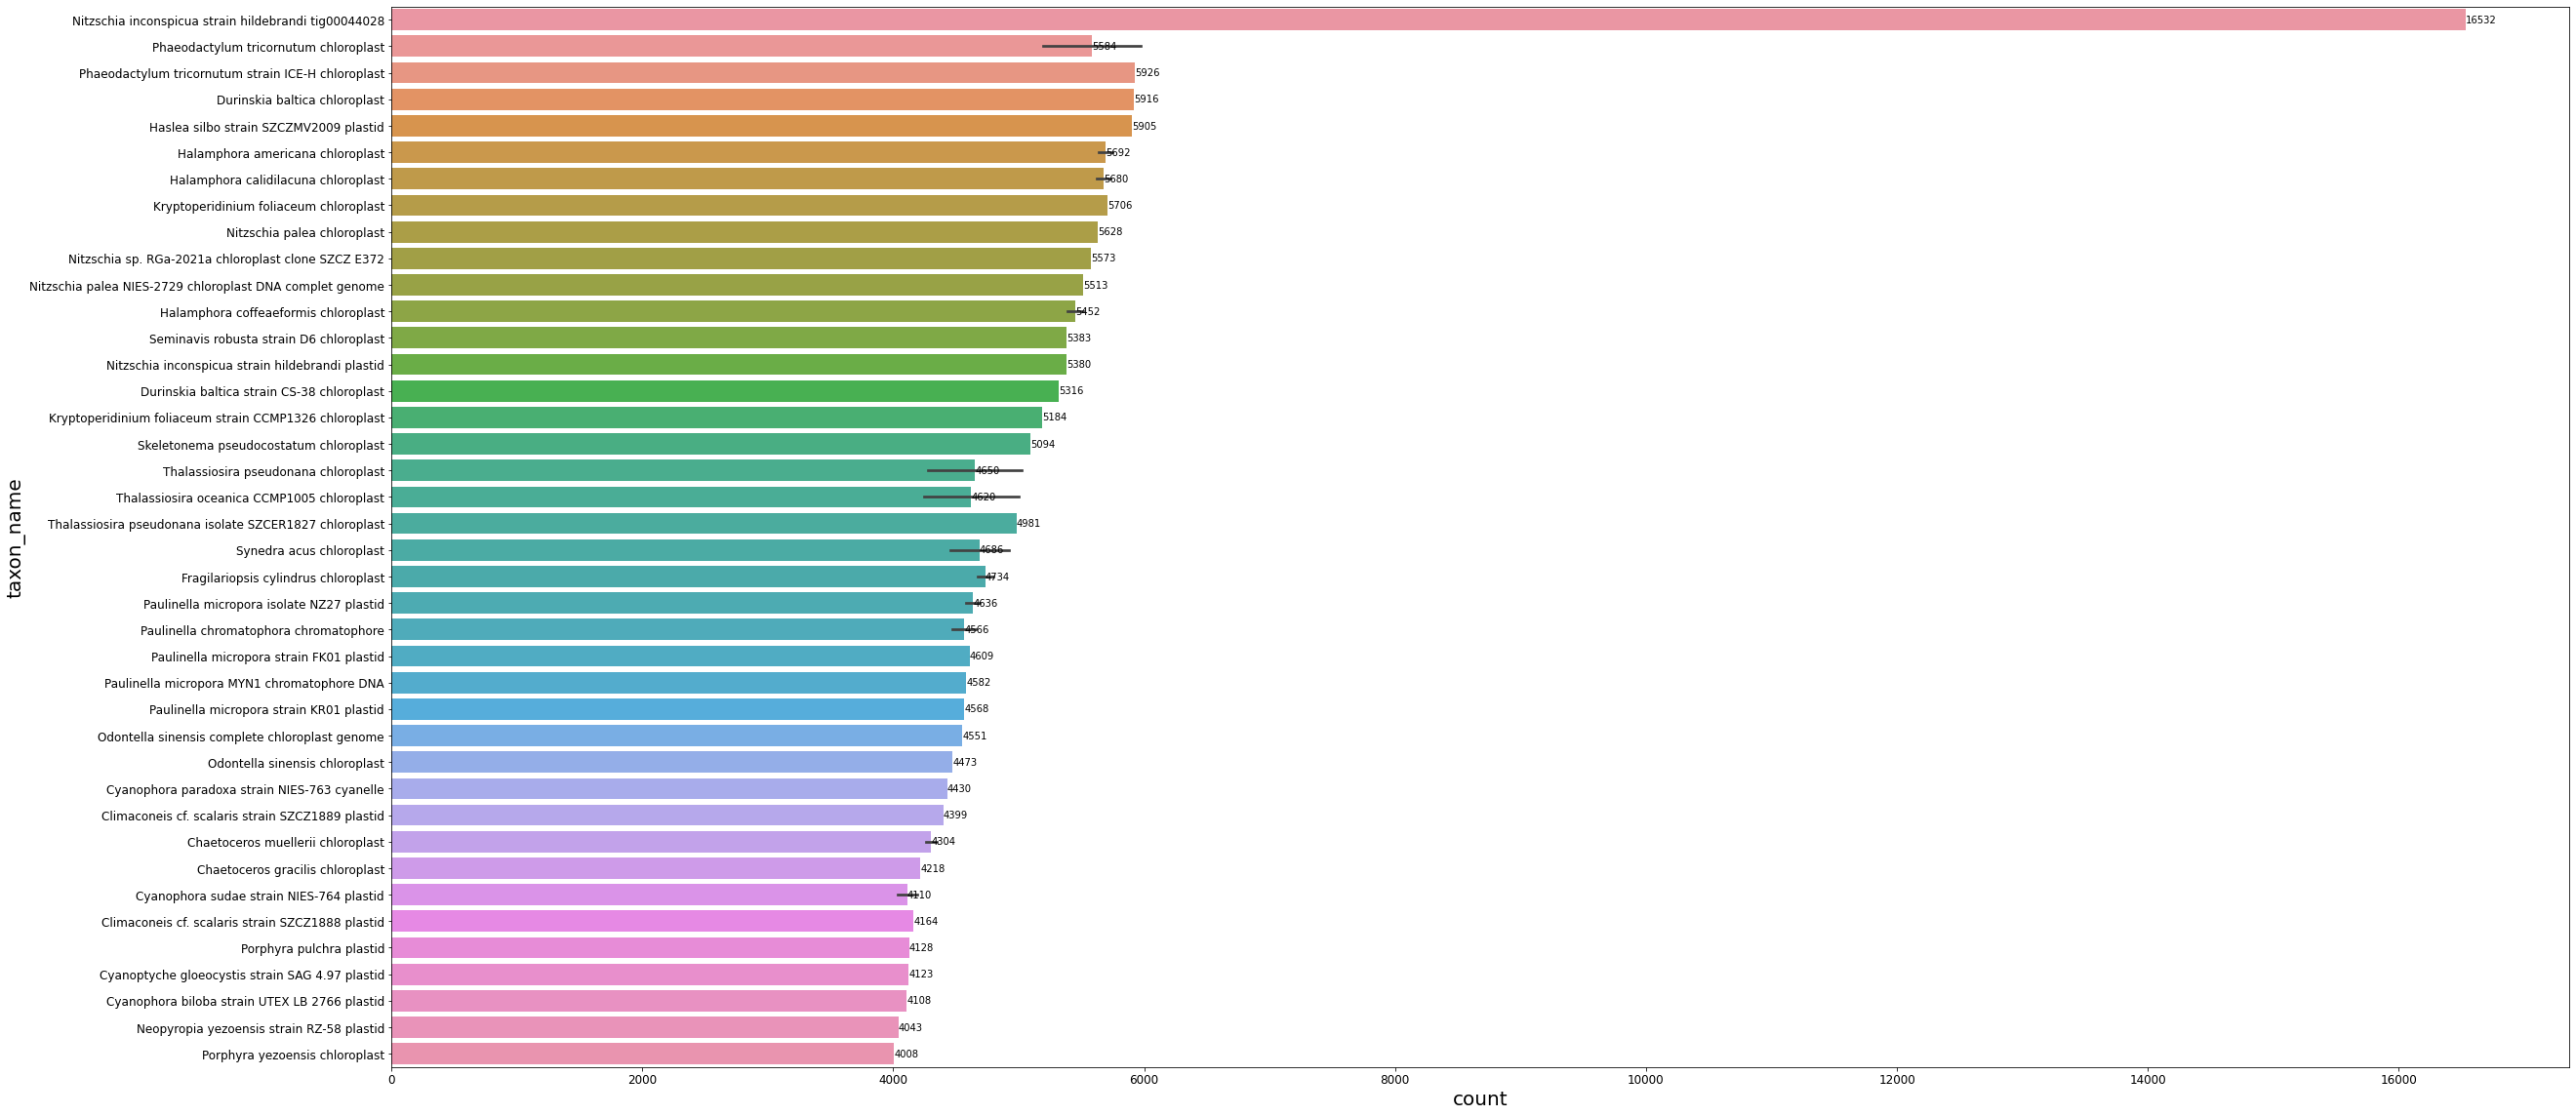

In [33]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 4000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
#plt.savefig('03_July142020_1e-20.jpeg', dpi=700)